In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from scipy import spatial
from tqdm.auto import tqdm

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-lbpm3dor because the default path (/home/i313924/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
model = pd.read_pickle('/pio/scratch/1/i313924/SVD_data/model_300_epochs.pkl')

## ABX

In [4]:
abx_tests = pd.read_json('/pio/scratch/1/i313924/test_data/test_ABX_weighted.json', lines=True)

In [5]:
def get_item_embedding(model, asin):
    item_id = model.item_mapping_[asin]
    return model.qi_[item_id]

In [6]:
A = np.zeros((10000, 100))
B = np.zeros((10000, 100))
X = np.zeros((10000, 100))

In [7]:
for i, test in tqdm(abx_tests.iterrows()):
    A[i, :] = get_item_embedding(model, test["A"])
    B[i, :] = get_item_embedding(model, test["B"])
    X[i, :] = get_item_embedding(model, test["X"])

0it [00:00, ?it/s]

In [8]:
dist_A = ((A - X)**2).sum(axis=1)
dist_B = ((B - X)**2).sum(axis=1)

In [9]:
(dist_A < dist_B).mean()

0.4996

In [10]:
cos_dist_A = np.zeros(10000)
cos_dist_B = np.zeros(10000)
for i in tqdm(range(10000)):
    cos_dist_A[i] = spatial.distance.cosine(A[i, :], X[i, :])
    cos_dist_B[i] = spatial.distance.cosine(B[i, :], X[i, :])

  0%|          | 0/10000 [00:00<?, ?it/s]

In [11]:
(cos_dist_A < cos_dist_B).mean()

0.5017

## Embeddings PCA

In [12]:
item_embeddings = pd.DataFrame(model.qi_)
user_embeddings = pd.DataFrame(model.pu_)

In [13]:
item_embeddings 

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.085119,0.121013,0.229977,0.236222,0.008979,0.040203,-0.092218,-0.329442,0.136364,0.237993,...,0.244824,0.145922,-0.118410,0.009936,-0.065004,-0.013078,0.013582,-0.040754,0.398014,-0.130427
1,0.403638,-0.760863,0.093106,0.054362,-0.520120,0.663898,0.175314,0.114048,0.071930,-0.184329,...,-0.344108,0.001519,-0.575414,0.317520,-0.421746,0.596076,-0.174439,-0.289917,0.130471,-0.020299
2,0.270657,-0.213378,0.069671,-0.349616,0.137565,-0.263935,-0.413856,-0.336866,-0.366784,-0.124781,...,0.130334,-0.361521,-0.307613,0.252134,0.304293,-0.193673,0.201167,-0.125605,0.422304,-0.495120
3,0.014009,-0.075361,-0.051900,-0.068920,0.046445,0.102387,-0.016596,-0.128653,-0.149736,0.234143,...,-0.246547,0.053430,0.260328,0.128060,0.088798,0.034862,-0.037414,-0.002557,-0.177609,0.214793
4,-0.071993,-0.104271,0.459524,0.206825,-0.390518,-0.179088,0.224100,0.163928,-0.285618,0.003658,...,0.855645,0.333683,-0.437352,-0.596779,0.353316,-0.188180,0.102604,-0.503846,0.768197,0.080569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681292,-0.019900,0.237566,0.031221,-0.076545,0.210581,0.206151,-0.035567,0.140632,0.040516,-0.176387,...,-0.061097,0.004755,0.065641,-0.108321,-0.090450,0.172245,0.022881,-0.128193,-0.094832,-0.078149
2681293,-0.157351,-0.003678,0.095681,0.126272,0.053508,-0.033527,0.054942,-0.021974,-0.060120,-0.015448,...,0.060171,0.027641,0.114246,0.005949,0.108792,-0.107645,-0.078128,-0.026275,0.026472,-0.020617
2681294,-0.295257,-0.015447,-0.005087,-0.034382,0.139125,-0.006970,-0.139233,-0.134804,-0.011187,-0.157656,...,-0.231247,-0.038038,-0.133894,0.023372,-0.084193,-0.096786,0.085791,-0.062872,0.057520,0.036985
2681295,0.046529,-0.013232,-0.015138,0.162150,-0.046513,-0.035479,-0.099651,0.079909,0.029563,0.136541,...,-0.010056,-0.161568,0.079136,0.035531,0.055263,0.101777,-0.154466,0.085854,0.084408,-0.067258


In [14]:
embeddings = pd.concat([item_embeddings, user_embeddings], keys=['items', 'users'])

In [15]:
pca = PCA(n_components=2)
pca.fit(embeddings)

PCA(n_components=2)

In [16]:
reduced_item_embeddings = pd.DataFrame(pca.transform(embeddings.loc["items"]))
reduced_user_embeddings = pd.DataFrame(pca.transform(embeddings.loc["users"]))

In [17]:
reduced_item_embeddings

,0,1
0,0.078722,-0.027699
1,0.076455,0.327306
2,0.329671,0.229925
3,-0.198463,-0.035045
4,-0.148245,0.139099
...,...,...
2681292,0.234479,-0.029382
2681293,-0.171223,0.068810
2681294,-0.051564,-0.027708
2681295,0.004193,0.070895


In [18]:
reduced_user_embeddings

,0,1
0,0.023387,0.059151
1,0.050425,0.202880
2,0.039737,-0.165746
3,-0.111962,-0.030254
4,0.001614,0.025326
...,...,...
12483673,0.078635,0.171895
12483674,-0.152008,-0.027740
12483675,-0.012083,-0.027068
12483676,-0.094174,-0.042714


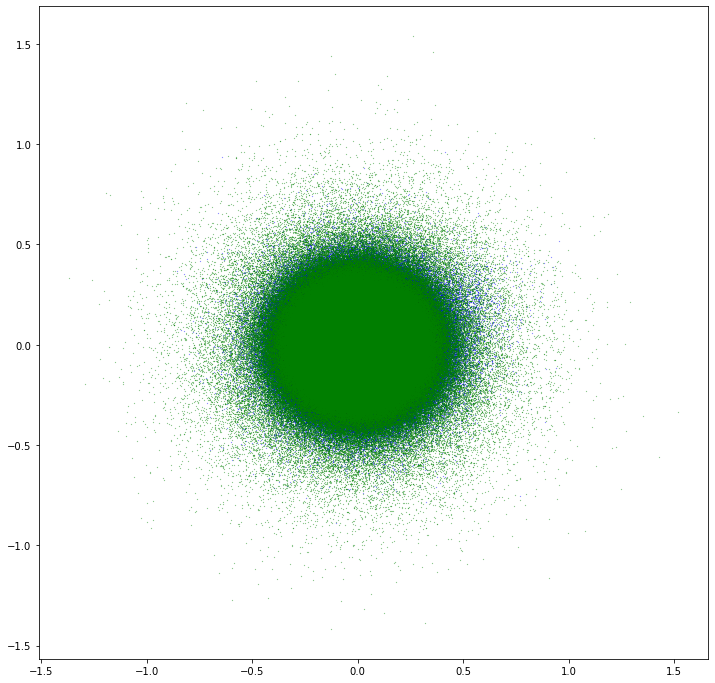

In [19]:
plt.figure(figsize=(12, 12))
plt.scatter(reduced_user_embeddings[0], reduced_user_embeddings[1], c='blue', s=0.03)
plt.scatter(reduced_item_embeddings[0], reduced_item_embeddings[1], c='green', s=0.03)

In [20]:
item_mapping = {v: k for k, v in model.item_mapping_.items()}
user_mapping = {v: k for k, v in model.user_mapping_.items()}

In [21]:
reduced_item_embeddings = reduced_item_embeddings.rename(index=item_mapping)

In [22]:
categories = pd.read_json('/pio/scratch/1/recommender_systems/interim/Amazon/meta_Clothing_Shoes_and_Jewelry_categories.json', lines=True)

In [23]:
reduced_item_embeddings = reduced_item_embeddings.join(categories.set_index('asin'))

In [24]:
reduced_item_embeddings.columns = ['0', '1', 'category_1', 'category_2']

<AxesSubplot:xlabel='0', ylabel='1'>

/pio/scratch/1/i313924/miniconda3/envs/venv/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


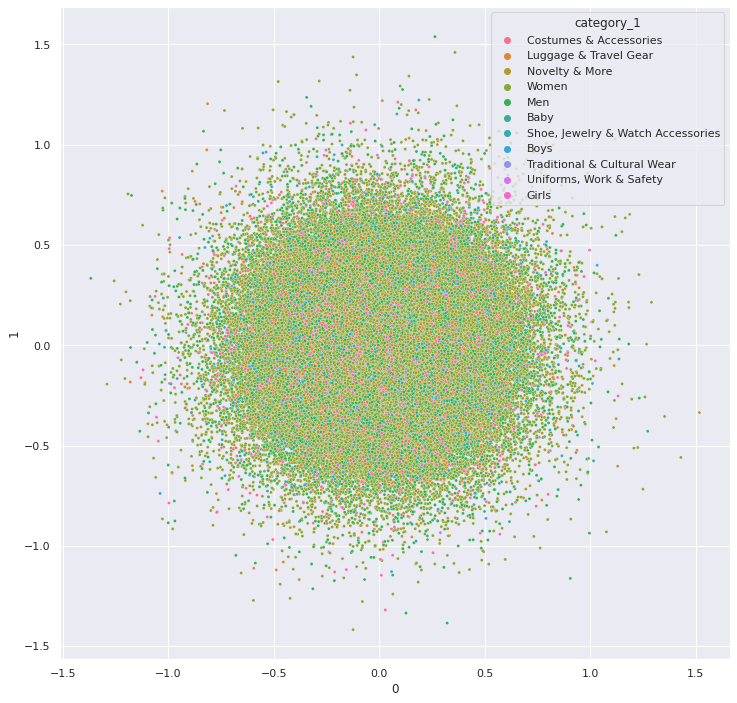

In [25]:
sns.set(rc={'figure.figsize':(12,12)})
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings, hue='category_1', s=10)

<AxesSubplot:xlabel='0', ylabel='1'>

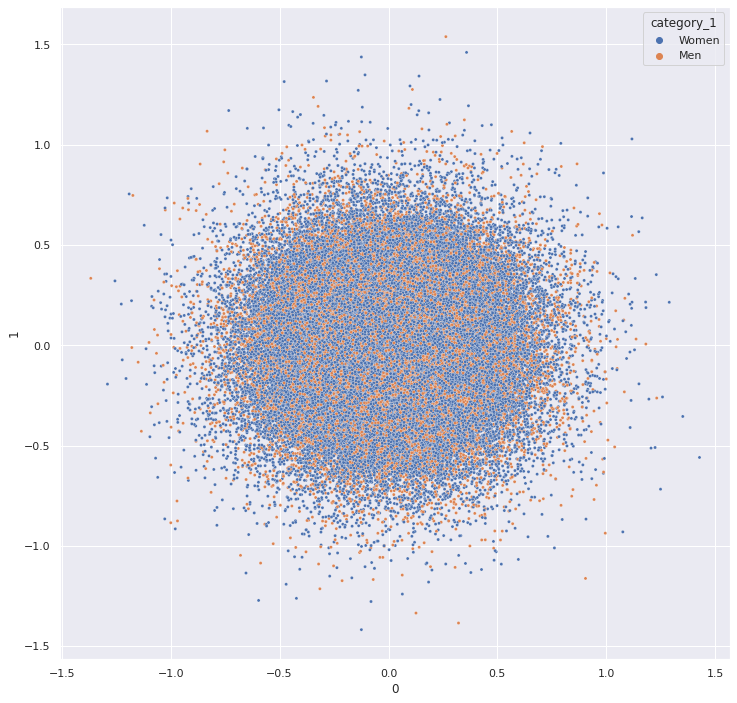

In [26]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Women', 'Men'])], hue='category_1', s=10)